# Housing Price Prediction Using Machine Learning


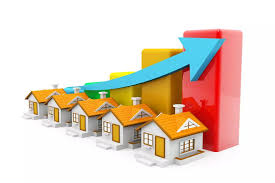

# Step 1- Load important Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle # for saving model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Some Extra modules
import os
import time
import warnings
warnings.filterwarnings("ignore")
print("All Module Loaded Successfully!!")

All Module Loaded Successfully!!


# Step 2- Importing Data


In [2]:
data = fetch_california_housing()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MedHouseVal"] = data.target

In [5]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9595,5.2662,16.0,5.869338,0.926829,1770.0,3.083624,37.31,-120.44,1.262
20297,2.7250,32.0,5.992395,1.133080,3490.0,6.634981,34.15,-119.22,4.500
20400,4.9234,25.0,5.824561,0.916667,691.0,3.030702,34.21,-118.85,2.414
11996,4.2263,21.0,6.560694,1.080925,2834.0,3.276301,33.94,-117.53,2.032
14286,3.3700,36.0,4.960130,1.045566,3093.0,2.516680,32.72,-117.12,1.591


In [6]:
print(data["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# Step 3- Exploratory Data Analysis

In [7]:
rows, col = df.shape
print("No. of Rows: ", rows)
print("No. of Cols: ", col)

No. of Rows:  20640
No. of Cols:  9


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.isna().sum()
# No Missing Values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

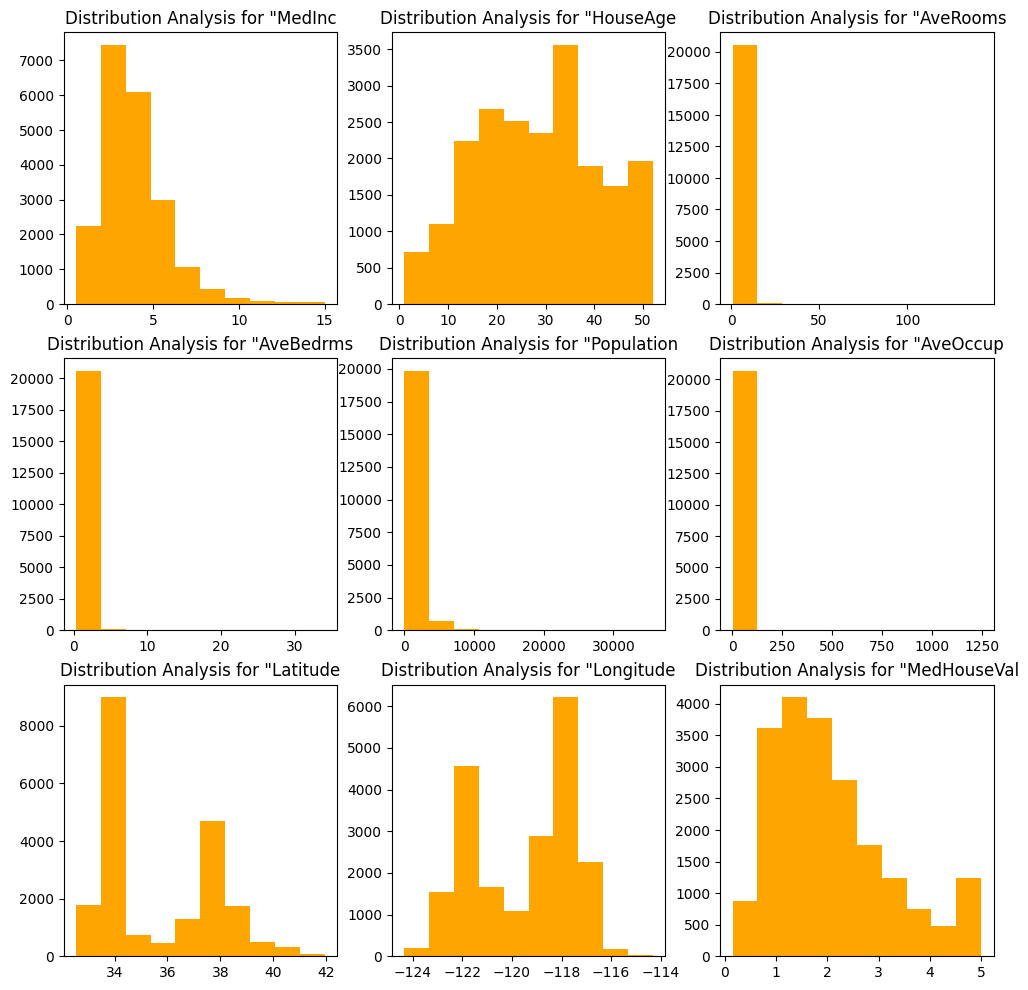

In [11]:
plt.figure(figsize=(12,12))
for i in range(len(df.columns)):
    plt.subplot(3,3,i+1)
    plt.title(f'Distribution Analysis for "{df.columns[i]}')
    plt.hist(df[df.columns[i]], color = "orange")

plt.show()


<Axes: title={'center': 'Correlation b/w Features '}>

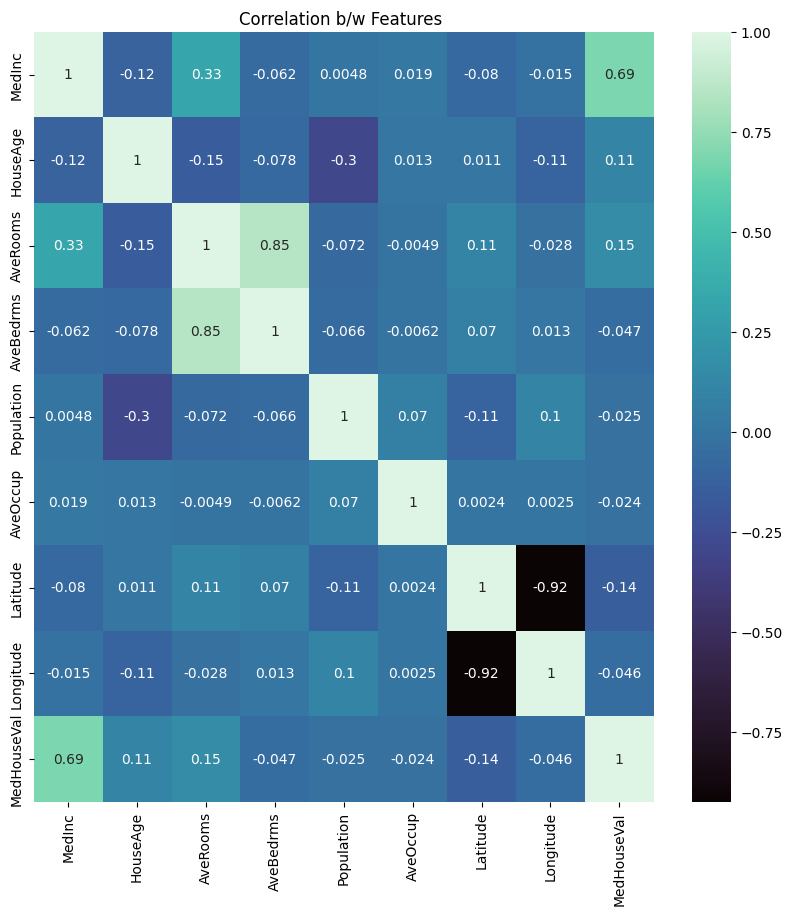

In [12]:
plt.figure(figsize=(10,10))
plt.title("Correlation b/w Features ")
sns.heatmap(df.corr(), annot = True , cmap = "mako")

# Step 4 Data Preprocessing

In [13]:
X = df.iloc[:, :-2] # Taking All the colmns without the last two col
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43


In [14]:
y = df["MedHouseVal"]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [15]:
#  Calling MIN_MAX_SCALER

scaler = MinMaxScaler()

In [16]:
scaled_X = scaler.fit_transform(X)

In [17]:
scaled_X_df = pd.DataFrame(scaled_X, columns = X.columns)

In [18]:
scaled_X_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293
...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200


In [19]:
scaled_X_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 5- Train & Test Data Part Divide

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.1, random_state = 32)

In [21]:
X_train.shape

X_test.shape

y_train.shape

y_test.shape

(2064,)

# Step 6- Model Building ML

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_predicted = model.predict(X_test)

In [25]:
compare_df = pd.DataFrame({"Actual Y: ": y_test, "Predicted Y: ": y_predicted})


In [26]:
compare_df


,Actual Y:,Predicted Y:
20038,0.52300,0.830969
17684,0.87500,1.171607
9720,2.53800,2.014867
17295,5.00001,4.142535
18736,0.98100,1.535928
...,...,...
12779,0.49800,0.990029
12771,0.67000,1.130043
15974,2.41900,2.563409
5100,1.42600,2.243695


# Step 7- Model Evaluation


In [27]:
score = model.score(X_test, y_test)
print("Model Score: " ,score)

Model Score:  0.551362762499376


In [28]:
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  0.5677843233572074


In [29]:
mse = mean_squared_error(y_test,y_predicted)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.6052385210505213


In [30]:
rmse = root_mean_squared_error(y_test,y_predicted)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.7779707713343229


# Step 8- Final Model Checking

In [31]:
matrix_dict = {"Model Number": [],"Model": [],"Model Score": [],"MAE": [],"MSE": [],"RMSE": []}

for i in range(5000):
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.1, random_state = i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test,y_predicted)
    mse = mean_squared_error(y_test,y_predicted)
    rmse = root_mean_squared_error(y_test,y_predicted)

    matrix_dict["Model Number"].append(i)
    matrix_dict["Model"].append( model)
    matrix_dict["Model Score"].append(score)
    matrix_dict["MAE"].append(mae)
    matrix_dict["MSE"].append(mse)
    matrix_dict["RMSE"].append(rmse)
    print(f'Checking Model {i+1}')
    display(clear = True)

matrix_df = pd.DataFrame(matrix_dict)
print("Done")

Done


In [32]:
matrix_df

,Model Number,Model,Model Score,MAE,MSE,RMSE
0,0,LinearRegression(),0.539876,0.584250,0.632354,0.795207
1,1,LinearRegression(),0.539413,0.574266,0.619368,0.786999
2,2,LinearRegression(),0.502733,0.589630,0.668455,0.817591
3,3,LinearRegression(),0.568915,0.563485,0.580866,0.762146
4,4,LinearRegression(),0.533087,0.573290,0.587384,0.766410
...,...,...,...,...,...,...
4995,4995,LinearRegression(),0.500881,0.574729,0.642570,0.801605
4996,4996,LinearRegression(),0.500247,0.576966,0.693597,0.832825
4997,4997,LinearRegression(),0.505985,0.576654,0.662073,0.813678
4998,4998,LinearRegression(),0.517502,0.568705,0.611983,0.782293


In [33]:
matrix_df["Model Score"].max()

np.float64(0.6053940148587416)

In [34]:
final_model_df = matrix_df[matrix_df["Model Score"] == matrix_df["Model Score"].max()]

In [35]:
matrix_positive_df = matrix_df[matrix_df["Model Score"] >= 0.50]

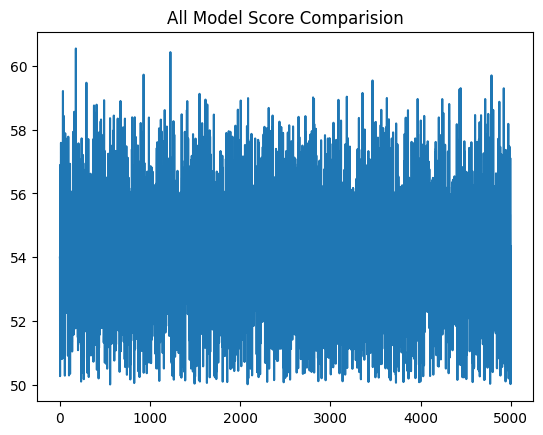

In [36]:
plt.plot(matrix_positive_df["Model Number"], matrix_positive_df["Model Score"]*100)
plt.title("All Model Score Comparision")
plt.show()

# Final Model Save

In [40]:
final_model = final_model_df["Model"]

In [41]:
final_model.values[0]

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
with open("price_prediction_for_house.pkl", "wb") as f:
    pickle.dump(final_model.values[0],f)
print("Model Saved Succesfully!!")

Model Saved Succesfully!!


# Step 10- Model Deployement on Wesite

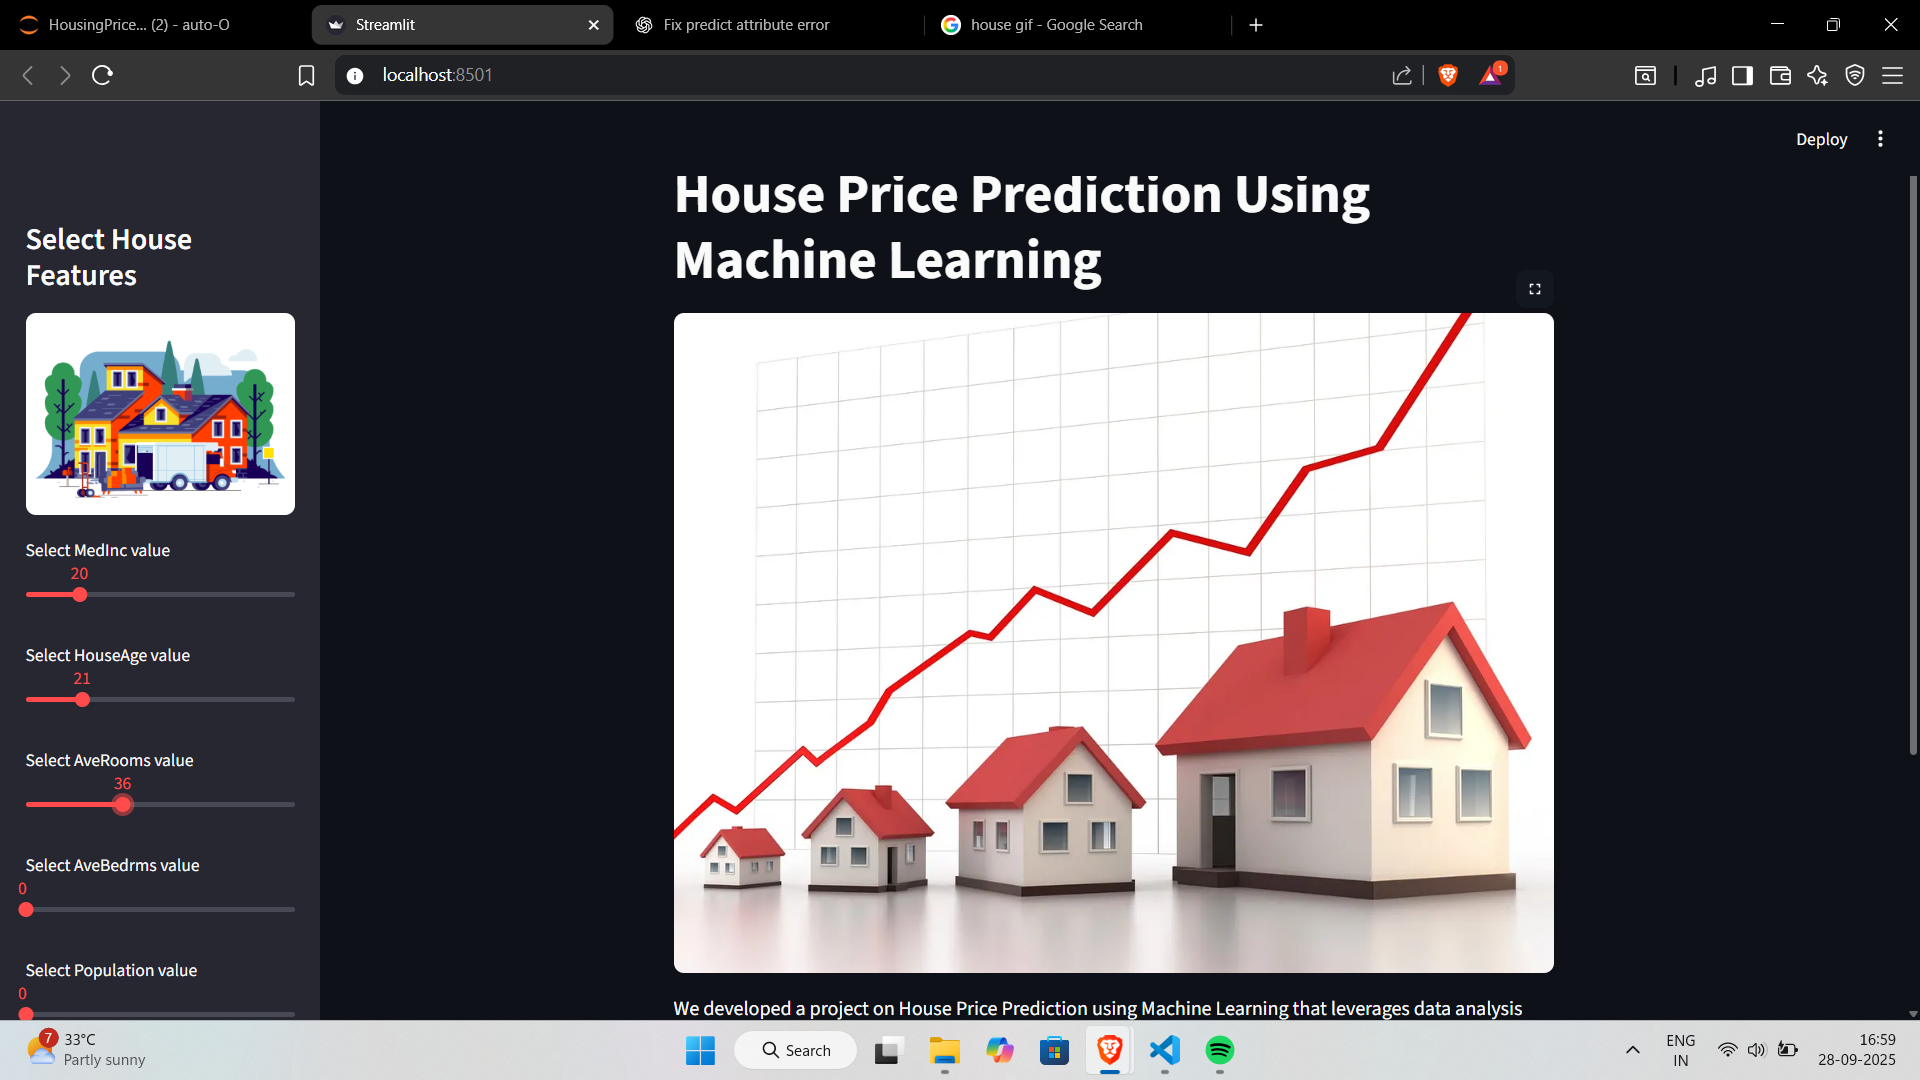